### <center><h1>Final Project: Energy Efficiency and Renewables Consumption</h1></center>

# Loading in data and libraries
For our project, we'll be using four datasets: GDP (World Bank), Primary Energy Consumption (BP Energy Review), Carbon Emissions (BP Energy Review), Renewable Energy Consumption (BP Energy Review)

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(tidyverse)
library(purrr)
library(broom)


renew_df <- read.csv("Renewables Consumption.csv")
primen_df <- read.csv("Primary Energy Data.csv")
carbon_df <- read.csv("Carbon Emissions Data.csv")
gdp1_df <- read.csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3358362.csv")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Renewable Energy Consumption
For this dataset there were many instances of missing datatypes, requiring that it be cleaned. To summarize, we essentially took a subset between the years 2000-2020 for countries with complete data (no NAs), referring to the direct specifications on the data file provided on instances of "^" and "-". Particularly in the case of "^" the file specified that it was $\le$ 0.005, so all instances were just replaced with 0.005 for consistency. We then changed the datatype of the colums from characters to a numerical datatype, in this case "double" as there are decimals. Lastly, we removed the rows without any data in them that were included in the dataset. Data was recorded as Exajoules in this case 10<sup>18.

In [2]:
renew_df <- renew_df[-c(57),]                                                           # This row was the USSR, did not get removed even when we used complete.cases, classic Soviets
renew_df <- subset (renew_df, select = -c(X1965:X1999,X2020.1,X2009.19,X2020.2))        # Selecting columns for the years 2000-2020
renew_df <- renew_df[complete.cases(renew_df), ]                                        # Filtering rows to select only those without missing datatypes
renew_df <- replace(renew_df, renew_df == "^", 0.005)                                   # Specified by BP World Energy Review
renew_df <- replace(renew_df, renew_df == "-", 0)                                       # Specified by BP World Energy Review
y <- c(2:22)
renew_df[ , y] <- apply(renew_df[ , y], 2,                                              # Changing type of data to numeric
                 function(x) as.numeric(as.character(x)))
colnames(renew_df)[1] <- "Country.Name"

renew_df <- renew_df[-c(104:144), ]                                                     # Removing empty rows
head(renew_df)                      

          

,Country.Name,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,⋯,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Canada,0.10,0.11,0.11,0.11,0.11,0.11,0.12,0.14,0.15,⋯,0.26,0.29,0.30,0.31,0.44,0.49,0.46,0.51,0.51,0.54
2,Mexico,0.07,0.07,0.06,0.07,0.07,0.08,0.08,0.08,0.08,⋯,0.09,0.10,0.11,0.13,0.16,0.17,0.19,0.24,0.30,0.36
3,US,0.86,0.88,0.99,1.05,1.14,1.22,1.44,1.65,2.06,⋯,3.03,3.27,3.70,3.98,4.19,4.74,5.17,5.44,5.71,6.15
4,Total North America,1.03,1.05,1.16,1.22,1.32,1.42,1.64,1.88,2.29,⋯,3.38,3.66,4.10,4.42,4.78,5.41,5.82,6.19,6.52,7.04
5,Argentina,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,⋯,0.05,0.07,0.07,0.08,0.08,0.08,0.09,0.08,0.12,0.13
6,Brazil,0.32,0.31,0.35,0.35,0.38,0.42,0.41,0.55,0.69,⋯,0.85,0.87,1.02,1.19,1.41,1.46,1.59,1.80,1.99,2.01


# Primary Energy Consumption

For this dataset, there were relatively few instances of missing datatypes. Many of the same processes that were conducted on the Renewable Energy dataframe were applied here, selecting the years 2000-2020, changing the type of data to numeric, and removing any rows containing missing datatypes. Data was reported in exajoules 10<sup>18.

In [3]:
primen_df <- primen_df[-c(57),]                                                            # Removing the USSR
primen_df <- subset (primen_df, select = -c(X1965:X1999,X2020.1,X2009.19,X2020.2))         # Selecting columns for years 2000-2020
primen_df <- primen_df[complete.cases(primen_df), ]                                        # Filtering rows to select only those without missing datatypes
i <- c(2:22)                                                                               
primen_df[ , i] <- apply(primen_df[ , i], 2,                                               # Changing type of data to numeric
                    function(x) as.numeric(as.character(x)))
colnames(primen_df)[1] <- "Country.Name"                                                   # Renaming column so dataframes match
primen_df <- primen_df[-c(103:110), ]                                                      # Removing empty rows
head(primen_df)

,Country.Name,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,⋯,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Canada,12.87,12.62,13.04,13.11,13.32,13.42,13.34,13.83,13.69,⋯,13.78,13.81,14.14,14.19,14.26,14.11,14.24,14.44,14.45,13.63
2,Mexico,5.86,5.79,5.98,6.03,6.35,6.76,6.97,7.01,7.16,⋯,7.66,7.71,7.74,7.70,7.69,7.79,7.90,7.84,7.55,6.48
3,US,95.13,92.89,94.23,94.52,96.38,96.42,95.64,96.97,94.58,⋯,92.05,89.62,92.04,92.99,92.09,91.96,92.26,95.64,94.90,87.79
4,Total North America,113.87,111.30,113.25,113.67,116.05,116.60,115.95,117.80,115.42,⋯,113.49,111.14,113.92,114.88,114.04,113.85,114.40,117.92,116.90,107.90
5,Argentina,2.55,2.49,2.39,2.55,2.71,2.87,3.02,3.16,3.20,⋯,3.34,3.46,3.59,3.59,3.66,3.63,3.64,3.59,3.38,3.15
6,Brazil,8.04,7.87,8.06,8.20,8.60,8.84,9.06,9.61,10.03,⋯,11.46,11.67,12.10,12.38,12.20,11.89,12.04,12.12,12.42,12.01


# Carbon Emissions

Much like the Primary Energy dataframe, there were few instances of missing datatypes. All the same processes were conducted to clean this data. Emissions were reported in millions of tonnes.

In [4]:
carbon_df <- carbon_df[-c(57),]                                         # Removing the USSR

carbon_df <- subset (carbon_df, select = -c(X1965:X1999,X2020.1:X.3))   # Selecting the years 2000-2020

carbon_df <- carbon_df[complete.cases(carbon_df), ]                     # Filtering rows to select only those without missing datatypes

n <- c(2:22)
carbon_df[ , n] <- apply(carbon_df[ , n], 2,                            # Changing type of data to numeric
                 function(x) as.numeric(as.character(x)))
                         
colnames(carbon_df)[1] <- "Country.Name"                                # Matching column names
                         
carbon_df <- carbon_df[-c(103:144), ]                                   # Removing rows with missing data
head(carbon_df)

,Country.Name,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,⋯,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Canada,538.0,540.1,553.2,562.0,559.2,560.3,553.1,578.5,564.6,⋯,554.7,551.1,564.6,571.8,570.2,553.3,565.9,576.2,578.0,517.7
2,Mexico,363.0,359.4,377.0,378.0,393.6,420.3,432.9,440.7,459.4,⋯,473.0,476.7,483.2,471.2,475.2,480.4,486.1,477.1,459.8,373.2
3,US,5745.8,5656.1,5677.9,5743.1,5844.3,5879.8,5802.5,5892.2,5710.2,⋯,5348.4,5101.5,5268.3,5277.6,5165.6,5060.8,5003.2,5166.0,5029.4,4457.2
4,Total North America,6646.7,6555.6,6608.0,6683.2,6797.1,6860.4,6788.4,6911.4,6734.1,⋯,6376.1,6129.4,6316.1,6320.5,6211.0,6094.5,6055.2,6219.4,6067.1,5348.1
5,Argentina,132.6,122.0,117.7,127.6,138.8,146.6,152.5,166.2,167.7,⋯,174.8,183.7,189.4,189.5,192.8,191.5,189.7,187.5,175.8,164.1
6,Brazil,306.4,316.1,315.3,311.4,325.8,334.8,339.1,353.6,377.3,⋯,427.2,445.7,485.8,508.0,490.7,454.1,460.6,445.5,444.9,417.5


# GDP by Country

There were fewer processes needed to clean this dataset. We only needed to select the columns (years) needed for our analysis. GDP was reported in current US\$ as of 2020.

In [5]:
gdp1_df <- subset (gdp1_df, select = -c(Country.Code:X1999))  # Removing columns with unnecessary information and years not included in primen_df
gdp1_df <- gdp1_df[complete.cases(gdp1_df), ]                 # Filtering rows to select only those without missing datatypes
head(gdp1_df)

,Country.Name,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,⋯,X2011,X2012,X2013,X2014,X2015,X2016,X2017,X2018,X2019,X2020
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Africa Eastern and Southern,268315000000,242105000000,247657000000,326744000000,405860000000,4.717430e+11,5.335330e+11,6.131640e+11,6.680370e+11,⋯,8.986050e+11,9.155900e+11,9.300860e+11,9.588250e+11,8.954400e+11,8.56992e+11,9.647910e+11,9.866110e+11,9.803720e+11,9.008290e+11
4,Africa Western and Central,134150000000,141863000000,170532000000,197384000000,245856000000,3.021110e+11,3.843360e+11,4.518660e+11,5.530310e+11,⋯,6.584280e+11,7.169350e+11,8.078190e+11,8.469430e+11,7.574920e+11,6.87485e+11,6.809890e+11,7.381310e+11,7.920790e+11,7.865850e+11
5,Angola,9129634978,8936063723,15285594828,17812705294,23552052408,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,⋯,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.01124e+11,1.221240e+11,1.013530e+11,8.941719e+10,6.230691e+10
6,Albania,3480355189,3922099471,4348070165,5611492283,7184681399,8.052076e+09,8.896074e+09,1.067732e+10,1.288135e+10,⋯,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.18612e+10,1.301969e+10,1.514702e+10,1.528661e+10,1.479962e+10
8,Arab World,737027000000,713134000000,713627000000,791228000000,940634000000,1.156060e+12,1.370260e+12,1.597880e+12,2.028260e+12,⋯,2.431650e+12,2.698850e+12,2.777410e+12,2.811490e+12,2.449470e+12,2.39953e+12,2.447380e+12,2.688050e+12,2.739880e+12,2.466010e+12
10,Argentina,284204000000,268697000000,97724004252,127587000000,164658000000,1.987370e+11,2.325570e+11,2.875310e+11,3.615580e+11,⋯,5.301630e+11,5.459820e+11,5.520250e+11,5.263200e+11,5.947490e+11,5.57531e+11,6.436290e+11,5.176270e+11,4.454450e+11,3.830670e+11


# Combining Dataframes
To combine all of the dataframes above, we first began by using pivot longer to turn everything into long form (i.e. each country and year combination has its own row). We then proceeded to horizontally merge the converted dataframes by pairs with an inner join on "Country.Name" and "year".

In [6]:
gdp_df <- gdp1_df %>%
    pivot_longer(
        cols = starts_with("X"),
        names_to = "year",
        values_to = "GDP"
        )

primary_df <- primen_df %>%
    pivot_longer(
        cols = starts_with("X"),
        names_to = "year",
        values_to = "PrimaryEnergyConsumption"
        )

renewables_df <- renew_df %>%
    pivot_longer(
        cols = starts_with("X"),
        names_to = "year",
        values_to = "RenewablesConsumption"
        )

emissions_df <- carbon_df %>%
    pivot_longer(
        cols = starts_with("X"),
        names_to = "year",
        values_to = "CarbonEmissions"
        )

combined1_df <- merge(gdp_df, primary_df, by=c("Country.Name","year"))
combined2_df <- merge(renewables_df, emissions_df, by=c("Country.Name","year"))
combined_df <- merge(combined1_df, combined2_df, by=c("Country.Name","year"))

# Creating new columns and scaling numbers
After combining the dataframes, we then created new columns such that numbers for energy consumption were expressed in gigajoules and emissions were expressed in tonnes. Furthermore, a column for energy intensity was created by dividing primary energy consumption by GDP. In a similar fashion, a column for carbon intensity was created by dividing carbon emissions by primary energy consumption. 

In [7]:
combined_df["PrimaryConsumption"] <- combined_df["PrimaryEnergyConsumption"]*10^9                                   # Reporting in gigajoules
combined_df["RenewableConsumption"] <- combined_df["RenewablesConsumption"]*10^9                                    # Reporting in gigajoules
combined_df["EnergyIntensity"] <- combined_df["PrimaryConsumption"]/combined_df["GDP"]                              # Gigajoules per dollar of GDP
combined_df["CarbonEmissionsinTonnes"] <- combined_df["CarbonEmissions"]*10^6                                       # Recording in tonnes
combined_df["CarbonIntensity"] <- combined_df["CarbonEmissionsinTonnes"]/combined_df["PrimaryConsumption"]          # Tonnes per gigajoule
combined_df["NonrenewableConsumption"] <- combined_df["PrimaryConsumption"] - combined_df["RenewableConsumption"]
combined_df <- subset(combined_df, select = -c(PrimaryEnergyConsumption, RenewablesConsumption, CarbonEmissions))

In [8]:
combined_df$year <- (sub('.', '', combined_df$year))
combined_df$year <- as.numeric(as.character(combined_df$year))
head(combined_df)


,Country.Name,year,GDP,PrimaryConsumption,RenewableConsumption,EnergyIntensity,CarbonEmissionsinTonnes,CarbonIntensity,NonrenewableConsumption
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Algeria,2000,54790379459,1.08e+09,0,0.01971149,76000000,0.07037037,1.08e+09
2,Algeria,2001,54744725766,1.12e+09,0,0.02045859,73400000,0.06553571,1.12e+09
3,Algeria,2002,56760318215,1.16e+09,0,0.02043681,76100000,0.06560345,1.16e+09
4,Algeria,2003,67863841333,1.21e+09,0,0.01782982,78800000,0.06512397,1.21e+09
5,Algeria,2004,85332581189,1.26e+09,0,0.01476576,81000000,0.06428571,1.26e+09
6,Algeria,2005,103198000000,1.32e+09,0,0.01279095,82900000,0.06280303,1.32e+09


# Trends in Carbon Intensity
The goal of the following analysis was to look at changes in countries' carbon intensities between the years 2000-2020. First getting a snapshot of the data, we look at the range and median of carbon intensities in 2000 and 2020 as well as a visualization of the carbon intensities in a few countries across time. Then we run a simple linear regression on the carbon intensity over the years.

[1] 0.0589039

[1] 0.0538241

[1] 0.01765000 0.09052632

[1] 0.01238095 0.08867347

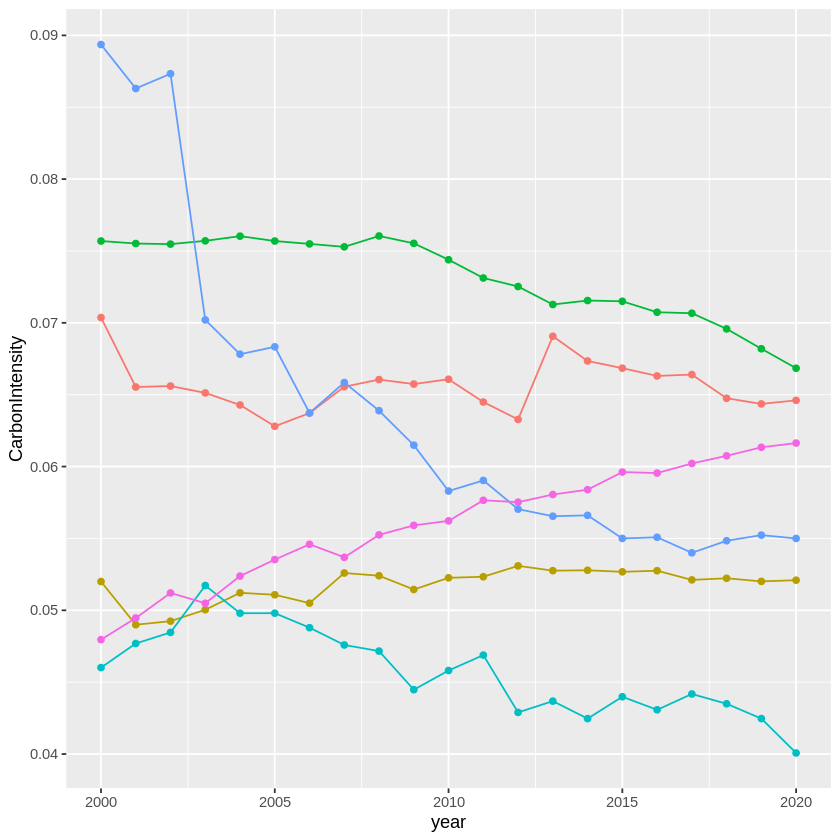

In [9]:
combined_2000 <- combined_df[combined_df$year == 2000,]
combined_2020 <- combined_df[combined_df$year == 2020,]
median2000 <- median(combined_2000$CarbonIntensity)
median2020 <- median(combined_2020$CarbonIntensity)
range2000 <- range(combined_2000$CarbonIntensity)
range2020 <- range(combined_2020$CarbonIntensity)
median2000
median2020
range2000
range2020

vis_df <- subset(combined_df, select= c(Country.Name, year, CarbonIntensity))
vis_df <- vis_df[1:126,]
ggplot(vis_df, aes(x=year, y=CarbonIntensity, group=Country.Name, color=Country.Name)) + 
geom_line() + geom_point() + 

theme(legend.position = "none")

We see that there indeed exist countries whose carbon intensities significantly increased and those whose decreased. 

Country.Name,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Azerbaijan,year,-0.0015744167,1.984043e-04,-7.935394,1.890056e-07
Denmark,year,-0.0011661629,7.845919e-05,-14.863305,6.465017e-12
Greece,year,-0.0008039268,5.957032e-05,-13.495423,3.479105e-11
Ireland,year,-0.0007678285,6.032488e-05,-12.728222,9.518648e-11
Finland,year,-0.0006983262,8.507063e-05,-8.208781,1.140678e-07
North Macedonia,year,-0.0006936836,1.450980e-04,-4.780793,1.299637e-04


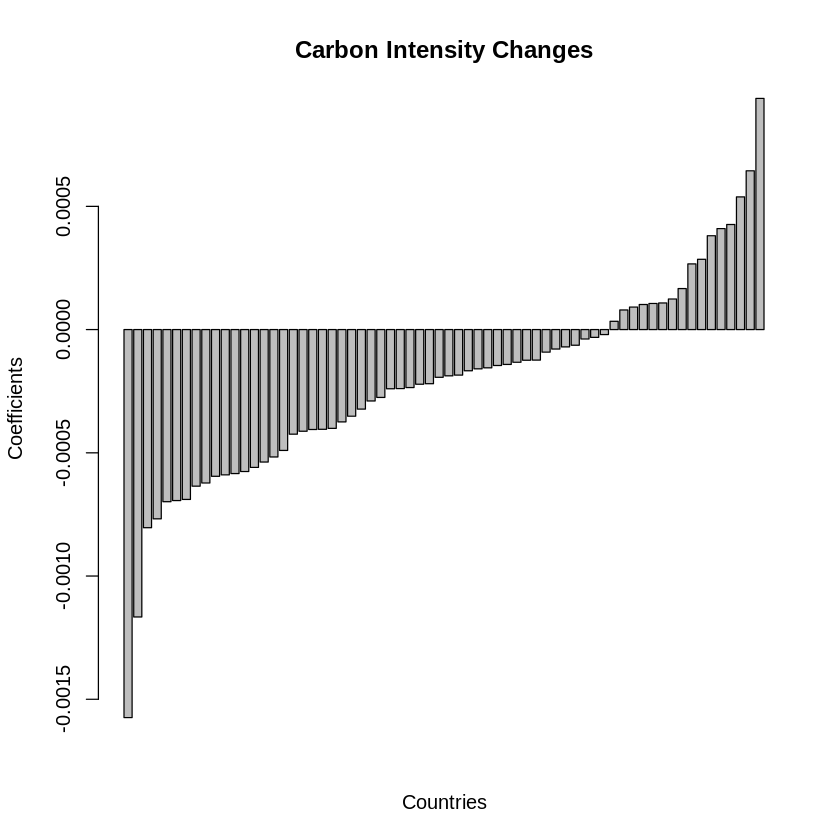

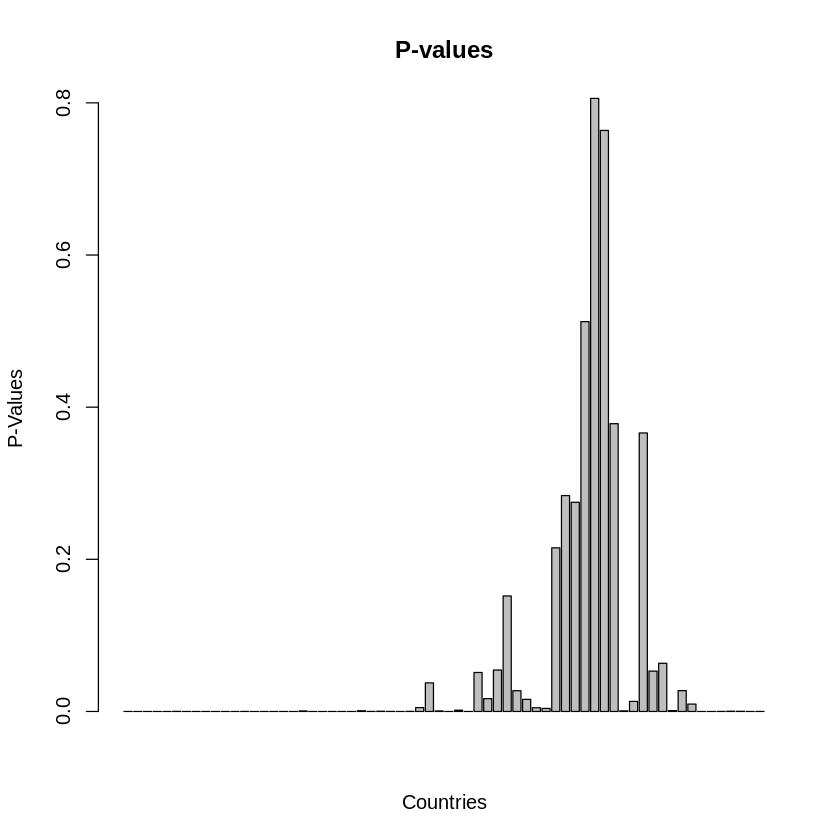

In [10]:
combined_nest <- combined_df %>%                     # Organizing into groups by country
    group_nest(Country.Name)

mod_fit <- function(data) {
    lm(CarbonIntensity ~ year, data=data)           # Essentially a line of best fit
    }

combined_model <- combined_nest %>%
    mutate(model = map(data, mod_fit))              # Applying regression to each group

combined_summary <- combined_model %>%
    mutate(
        tidy = map(model, broom::tidy),             # Cleaning up outputs
        )

combined_summary <- combined_summary %>%
unnest(tidy) %>%
filter(term == "year") %>%                          # Selecting rows with "year" term only
arrange(estimate)

combined_summary <- subset(combined_summary, select = -c(data, model))

head(combined_summary)

barplot(combined_summary$estimate, ylab = "Coefficients", xlab = "Countries", main = "Carbon Intensity Changes")
barplot(combined_summary$p.value, ylab = "P-Values", xlab = "Countries", main = "P-values")

In [11]:
sig_df <- subset(combined_summary, p.value <= 0.05)
dim(sig_df)
as.list(combined_summary['Country.Name'])

[1] 53  6

$Country.Name
 [1] "Azerbaijan"         "Denmark"            "Greece"            
 [4] "Ireland"            "Finland"            "North Macedonia"   
 [7] "Czech Republic"     "Israel"             "Portugal"          
[10] "United Kingdom"     "Poland"             "China"             
[13] "Iceland"            "Romania"            "Spain"             
[16] "Italy"              "Thailand"           "Australia"         
[19] "Ecuador"            "Hungary"            "Austria"           
[22] "Belgium"            "Sweden"             "Germany"           
[25] "Croatia"            "Turkey"             "Slovenia"          
[28] "Morocco"            "France"             "Netherlands"       
[31] "Latvia"             "Estonia"            "Luxembourg"        
[34] "Canada"             "Ukraine"            "Russian Federation"
[37] "New Zealand"        "Singapore"          "Cyprus"            
[40] "Bulgaria"           "Norway"             "Switzerland"       
[43] "Mexico"             "Saudi Arabia"       "Malaysia"          
[46] "Kazakhstan"         "Brazil"             "Peru"              
[49] "Qatar"              "Algeria"            "South Africa"      
[52] "Uzbekistan"         "India"              "Vietnam"           
[55] "Pakistan"           "Belarus"            "Argentina"         
[58] "Colombia"           "Sri Lanka"          "Indonesia"         
[61] "Philippines"        "Japan"              "Iraq"              
[64] "Chile"              "Bangladesh"         "Lithuania"

# Countries of interest
Clearly, many of the countries we are looking at have decreased their carbon intensity over the past two decades. We looked at the carbon intensity decrease relative to 2000 levels to orient a scale for reference (percentage, fraction, etc.) for Azerbaijan and Algeria, the countries with the largest and smallest non-negative decrease in carbon intensity. Because there are clearly a larger fraction of countries whose carbon intensities decreased, this seems to suggest that if renewable energy consumption increased in this period for countries, there will likely be an inverse relationship with carbon intensity.

In [12]:
Azerbaijan_2000 <- combined_df[combined_df$Country.Name == "Azerbaijan" & combined_df$year == 2000, ]
Azerbaijan_Carbon <- Azerbaijan_2000$CarbonIntensity
Algeria_2000 <- combined_df[combined_df$Country.Name == "Algeria" & combined_df$year == 2000, ]
Algeria_Carbon <- Algeria_2000$CarbonIntensity
Azerbaijan_row <- combined_summary[combined_summary$Country.Name == "Azerbaijan",]
Azerbaijan_decr <- Azerbaijan_row$estimate
Algeria_row <- combined_summary[combined_summary$Country.Name == "Algeria",]
Algeria_decr <- Algeria_row$estimate
Azerb_percent <- -(Azerbaijan_decr/Azerbaijan_Carbon)*100
Alger_percent <- -(Algeria_decr/Algeria_Carbon)*100
Azerb_percent
Alger_percent  # This was definitely doable with a function but I was lazy...

[1] 1.761847

[1] 0.0286115

We see that our linear model's prediction of the decrease in carbon intensity in Azerbaijan was approximately 1.76% from 2000 to 2001. This is a relatively large decrease meaning that the combination of increase in energy consumption and decrease in carbon emissions that caused this trend is indeed worth examining further. By year 20, this accumulates to an approximately 35% decrease in carbon intensity from year 1. 

# Final Analysis
We have now prepared for the final analysis. We will be looking at the relationship between renewable energy use and carbon intensity. To do this, we'll be regressing carbon intensity on both renewable consumption and nonrenewable consumption. This is to ensure that any effect of renewable consumption on carbon intensity is not caused by shifts in nonrenewable consumption instead. We will compare results from a fixed effect and random effect model and use the Hausman test to make our final selection of 

In [13]:
install.packages('plm')
library('plm')



also installing the dependencies ‘miscTools’, ‘rbibutils’, ‘bdsmatrix’, ‘sandwich’, ‘maxLik’, ‘Rdpack’, ‘Formula’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘plm’


The following objects are masked from ‘package:dplyr’:

    between, lag, lead




In [14]:
panel_data <- pdata.frame(combined_df, index=c("Country.Name","year"))
head(panel_data,)

,Country.Name,year,GDP,PrimaryConsumption,RenewableConsumption,EnergyIntensity,CarbonEmissionsinTonnes,CarbonIntensity,NonrenewableConsumption
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria-2000,Algeria,2000,54790379459,1.08e+09,0,0.01971149,76000000,0.07037037,1.08e+09
Algeria-2001,Algeria,2001,54744725766,1.12e+09,0,0.02045859,73400000,0.06553571,1.12e+09
Algeria-2002,Algeria,2002,56760318215,1.16e+09,0,0.02043681,76100000,0.06560345,1.16e+09
Algeria-2003,Algeria,2003,67863841333,1.21e+09,0,0.01782982,78800000,0.06512397,1.21e+09
Algeria-2004,Algeria,2004,85332581189,1.26e+09,0,0.01476576,81000000,0.06428571,1.26e+09
Algeria-2005,Algeria,2005,103198000000,1.32e+09,0,0.01279095,82900000,0.06280303,1.32e+09


In [15]:
re_renew_plm <- plm(CarbonIntensity ~ RenewableConsumption + NonrenewableConsumption + GDP, 
                    data = panel_data, 
                    index = c("Country.Name", "year"), 
                    model = "random")
summary(re_renew_plm)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = CarbonIntensity ~ RenewableConsumption + NonrenewableConsumption + 
    GDP, data = panel_data, model = "random", index = c("Country.Name", 
    "year"))

Balanced Panel: n = 66, T = 21, N = 1386

Effects:
                    var   std.dev share
idiosyncratic 1.146e-05 3.385e-03 0.054
individual    2.013e-04 1.419e-02 0.946
theta: 0.948

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-1.4528e-02 -1.8798e-03  2.6705e-06  2.0054e-03  2.5820e-02 

Coefficients:
                           Estimate  Std. Error z-value  Pr(>|z|)    
(Intercept)              5.7503e-02  1.7531e-03 32.8018 < 2.2e-16 ***
RenewableConsumption    -2.9309e-12  5.6116e-13 -5.2230 1.761e-07 ***
NonrenewableConsumption  1.6892e-13  5.1813e-14  3.2601  0.001114 ** 
GDP                     -5.5018e-16  4.6327e-16 -1.1876  0.234996    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.

In [16]:
fe_renew_plm <- plm(CarbonIntensity ~ RenewableConsumption + NonrenewableConsumption + GDP, 
                    data = panel_data, 
                    index = c("Country.Name", "year"), 
                    model = "within")
summary(fe_renew_plm)

Oneway (individual) effect Within Model

Call:
plm(formula = CarbonIntensity ~ RenewableConsumption + NonrenewableConsumption + 
    GDP, data = panel_data, model = "within", index = c("Country.Name", 
    "year"))

Balanced Panel: n = 66, T = 21, N = 1386

Residuals:
       Min.     1st Qu.      Median     3rd Qu.        Max. 
-1.4691e-02 -1.7727e-03  8.5975e-05  1.7470e-03  2.5495e-02 

Coefficients:
                           Estimate  Std. Error t-value  Pr(>|t|)    
RenewableConsumption    -2.9702e-12  5.6431e-13 -5.2634 1.649e-07 ***
NonrenewableConsumption  1.5540e-13  5.3251e-14  2.9182  0.003581 ** 
GDP                     -4.5750e-16  4.7094e-16 -0.9715  0.331495    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    0.016116
Residual Sum of Squares: 0.015089
R-Squared:      0.063734
Adj. R-Squared: 0.015392
F-statistic: 29.8839 on 3 and 1317 DF, p-value: < 2.22e-16

# Choosing a test
We then run the Hausman test to check whether the individual error terms are correlated with the regressors. The null hypothesis stating that there is no correlation would lead us to choose the random effects model while the alternative hypothesis that there is a corrrelation would lead us to choose the fixed effects model. 

In [17]:
phtest(fe_renew_plm, re_renew_plm)


	Hausman Test

data:  CarbonIntensity ~ RenewableConsumption + NonrenewableConsumption +  ...
chisq = 1.5061, df = 3, p-value = 0.6809
alternative hypothesis: one model is inconsistent


The null hypothesis cannot be rejected seen by the high p-value , so we choose  the random effects model over the fixed effects model.

# Population and Per Capita GDP
The last of our analyses looks at the relationship between carbon intensity and GDP per capita. To do this we calculate gdp per capita by dividing GDP by population for each country each year.

In [18]:
pop1_df <- read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_3358390.csv")
head(pop1_df)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character()
)
ℹ Use `spec()` for the full column specifications.




Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,⋯,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,"Population, total",SP.POP.TOTL,54208,55434,56234,56699,57029,57357,⋯,102050,102565,103165,103776,104339,104865,105361,105846,106310,106766
Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,⋯,532760424,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,⋯,30117411,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341
Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,⋯,360285439,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476
Angola,AGO,"Population, total",SP.POP.TOTL,5454938,5531451,5608499,5679409,5734995,5770573,⋯,24220660,25107925,26015786,26941773,27884380,28842482,29816769,30809787,31825299,32866268
Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,⋯,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743


In [19]:
pop1_df <- subset (pop1_df, select = -c(2:44))  # Removing columns with unnecessary information and years not included in primen_df
pop1_df <- pop1_df[complete.cases(pop1_df), ]                 # Filtering rows to select only those without missing datatypes
head(pop1_df)


Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,⋯,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,90866,92892,94992,97016,98744,100028,100830,101226,101362,⋯,102050,102565,103165,103776,104339,104865,105361,105846,106310,106766
Africa Eastern and Southern,398113044,408522129,419223717,430246635,441630149,453404076,465581372,478166911,491173160,⋯,532760424,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299
Afghanistan,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,⋯,30117411,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341
Africa Western and Central,267214544,274433894,281842480,289469530,297353098,305520588,313985474,322741656,331772330,⋯,360285439,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476
Angola,16395477,16945753,17519418,18121477,18758138,19433604,20149905,20905360,21695636,⋯,24220660,25107925,26015786,26941773,27884380,28842482,29816769,30809787,31825299,32866268
Albania,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,⋯,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743


In [20]:
pop_df <- pop1_df %>%
    pivot_longer(
        cols = starts_with("2"),
        names_to = "year",
        values_to = "Population"
        )

pop_df$year <- as.numeric(as.character(pop_df$year))
head(pop_df)

Country Name,year,Population
<chr>,<dbl>,<dbl>
Aruba,2000,90866
Aruba,2001,92892
Aruba,2002,94992
Aruba,2003,97016
Aruba,2004,98744
Aruba,2005,100028


In [21]:
colnames(pop_df) <- c('Country.Name','year','Population')
final_df <- merge(combined_df, pop_df, by=c("Country.Name","year"))
final_df['gdpcapita'] <- final_df['GDP']/final_df['Population']
final_df <- subset(final_df, select = -c(Population))

head(final_df)
#pop_df$year <- (sub('.', '', pop_df$year))

,Country.Name,year,GDP,PrimaryConsumption,RenewableConsumption,EnergyIntensity,CarbonEmissionsinTonnes,CarbonIntensity,NonrenewableConsumption,gdpcapita
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Algeria,2000,54790379459,1.08e+09,0,0.01971149,76000000,0.07037037,1.08e+09,1765.027
2,Algeria,2001,54744725766,1.12e+09,0,0.02045859,73400000,0.06553571,1.12e+09,1740.607
3,Algeria,2002,56760318215,1.16e+09,0,0.02043681,76100000,0.06560345,1.16e+09,1781.828
4,Algeria,2003,67863841333,1.21e+09,0,0.01782982,78800000,0.06512397,1.21e+09,2103.382
5,Algeria,2004,85332581189,1.26e+09,0,0.01476576,81000000,0.06428571,1.26e+09,2610.185
6,Algeria,2005,103198000000,1.32e+09,0,0.01279095,82900000,0.06280303,1.32e+09,3113.088


In [22]:
re_gdp_plm <- plm(gdpcapita ~ CarbonIntensity, 
                    data = final_df, 
                    index = c("Country.Name", "year"), 
                    model = "random")
summary(re_gdp_plm)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = gdpcapita ~ CarbonIntensity, data = final_df, model = "random", 
    index = c("Country.Name", "year"))

Balanced Panel: n = 66, T = 21, N = 1386

Effects:
                    var   std.dev share
idiosyncratic  57535924      7585 0.129
individual    388990376     19723 0.871
theta: 0.9164

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-39057.07  -3003.22   -315.97   2840.47  31239.21 

Coefficients:
                 Estimate Std. Error z-value  Pr(>|z|)    
(Intercept)       53999.4     4061.8 13.2945 < 2.2e-16 ***
CarbonIntensity -559563.9    56415.4 -9.9186 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    8.5237e+10
Residual Sum of Squares: 7.9581e+10
R-Squared:      0.066366
Adj. R-Squared: 0.065691
Chisq: 98.3793 on 1 DF, p-value: < 2.22e-16

In [23]:
fe_gdp_plm <- plm(gdpcapita ~ CarbonIntensity, 
                    data = final_df, 
                    index = c("Country.Name", "year"), 
                    model = "within")
summary(fe_gdp_plm)

Oneway (individual) effect Within Model

Call:
plm(formula = gdpcapita ~ CarbonIntensity, data = final_df, model = "within", 
    index = c("Country.Name", "year"))

Balanced Panel: n = 66, T = 21, N = 1386

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-45650.74  -2231.59    386.47   2964.22  28584.62 

Coefficients:
                Estimate Std. Error t-value  Pr(>|t|)    
CarbonIntensity  -552079      59751 -9.2397 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    8.0802e+10
Residual Sum of Squares: 7.589e+10
R-Squared:      0.06079
Adj. R-Squared: 0.013794
F-statistic: 85.3713 on 1 and 1319 DF, p-value: < 2.22e-16

In [24]:
phtest(fe_gdp_plm, re_gdp_plm)


	Hausman Test

data:  gdpcapita ~ CarbonIntensity
chisq = 0.14457, df = 1, p-value = 0.7038
alternative hypothesis: one model is inconsistent


The p-value is high so we select the random effects model once again.
